### VISION : MOTION ESTIMATION PW REPORT

**Authors:**  
*Maximilien NOWAK*  
*Matthieu DE CASTELBAJAC*

In this practical work report, we compare and experiment with two methods to compute the optical flow using pairs of images - the Horn & Schunck method and the Lucas & Kanade scheme. We provide a python `method_name.py` library for each, and test them with the attached dataset.

In [1]:
%load_ext autoreload
%autoreload 2

### Horn & Schunk 

In [2]:
from python.lucasKanade import optimize_LK, lucasKanade, lucasKanadeBartlett
from python.utils import get_data, plot_all_horn, plot_all_LK
from python.middlebury import computeColor
import matplotlib.pyplot as plt

100%|██████████| 4/4 [06:37<00:00, 99.44s/it] 


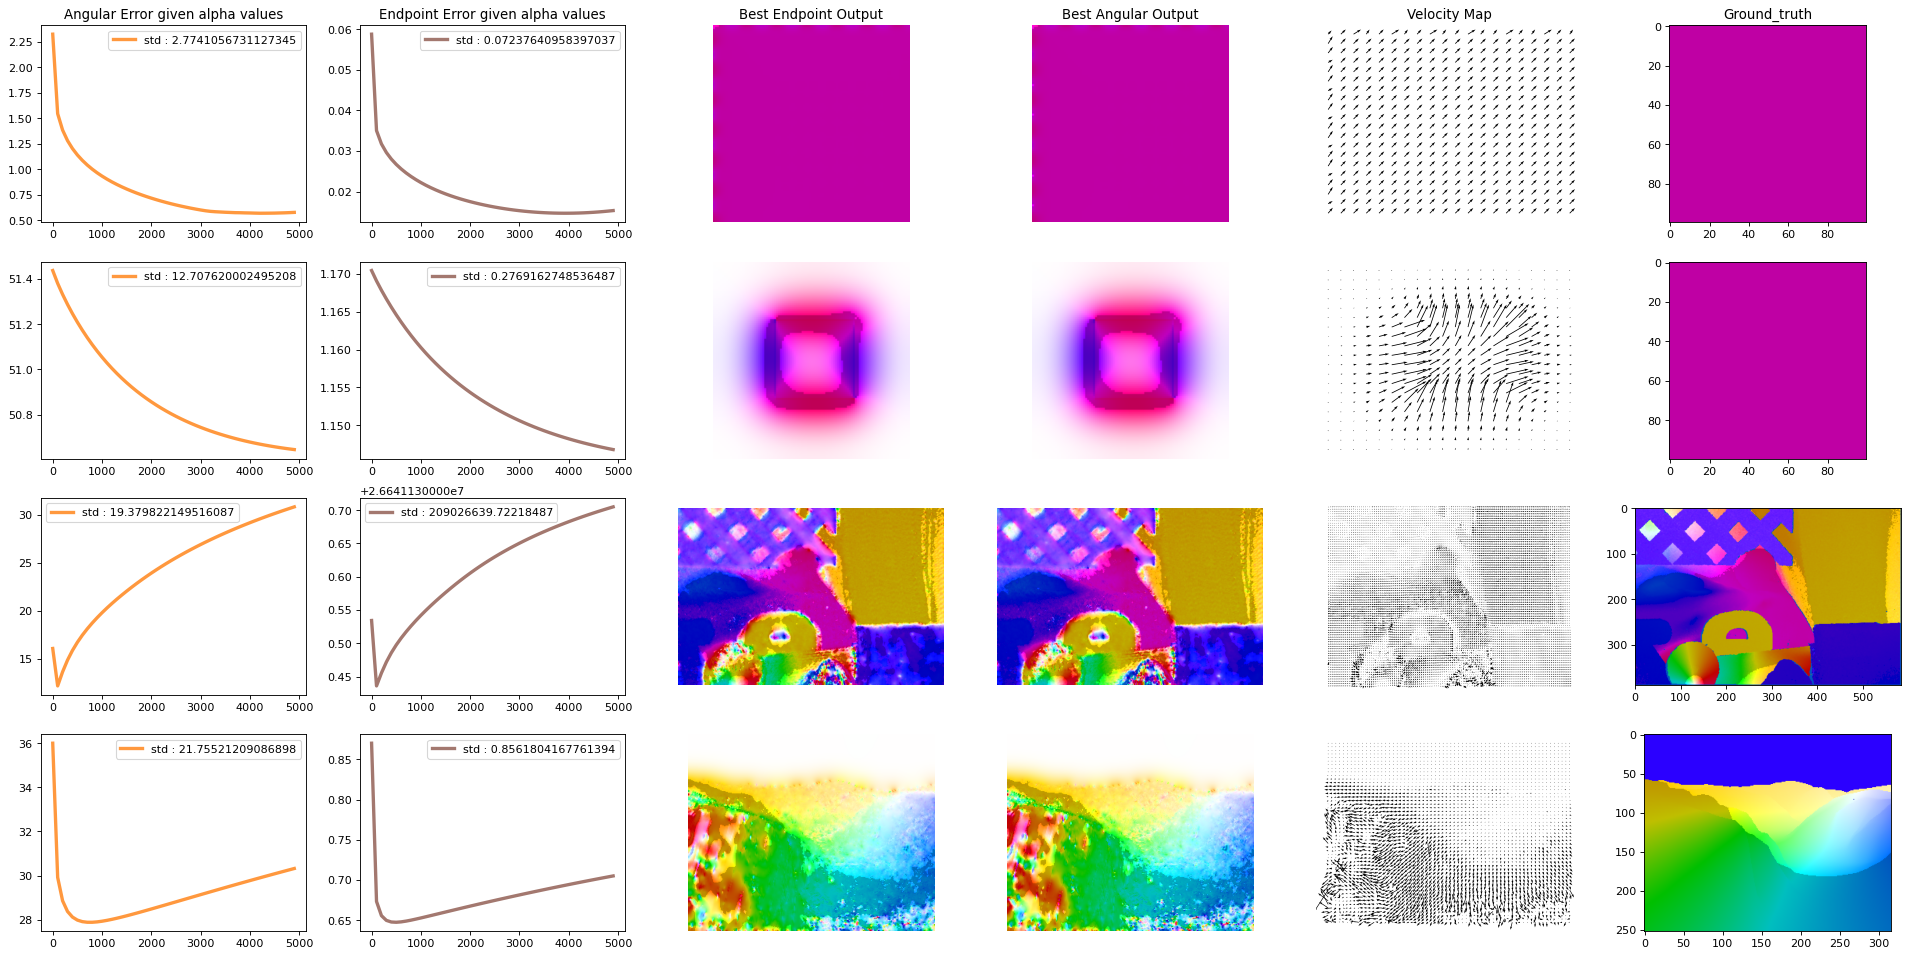

In [18]:
plot_all_horn()

**Comments**  
*Square* --> correctness  
*Mysim* --> best alpha value ?  
*Yosemite and error plots* -->

100%|██████████| 27/27 [00:15<00:00,  1.78it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
100%|██████████| 27/27 [00:13<00:00,  2.01it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 50%|█████     | 2/4 [05:59<05:59, 179.79s/it]


KeyboardInterrupt: 

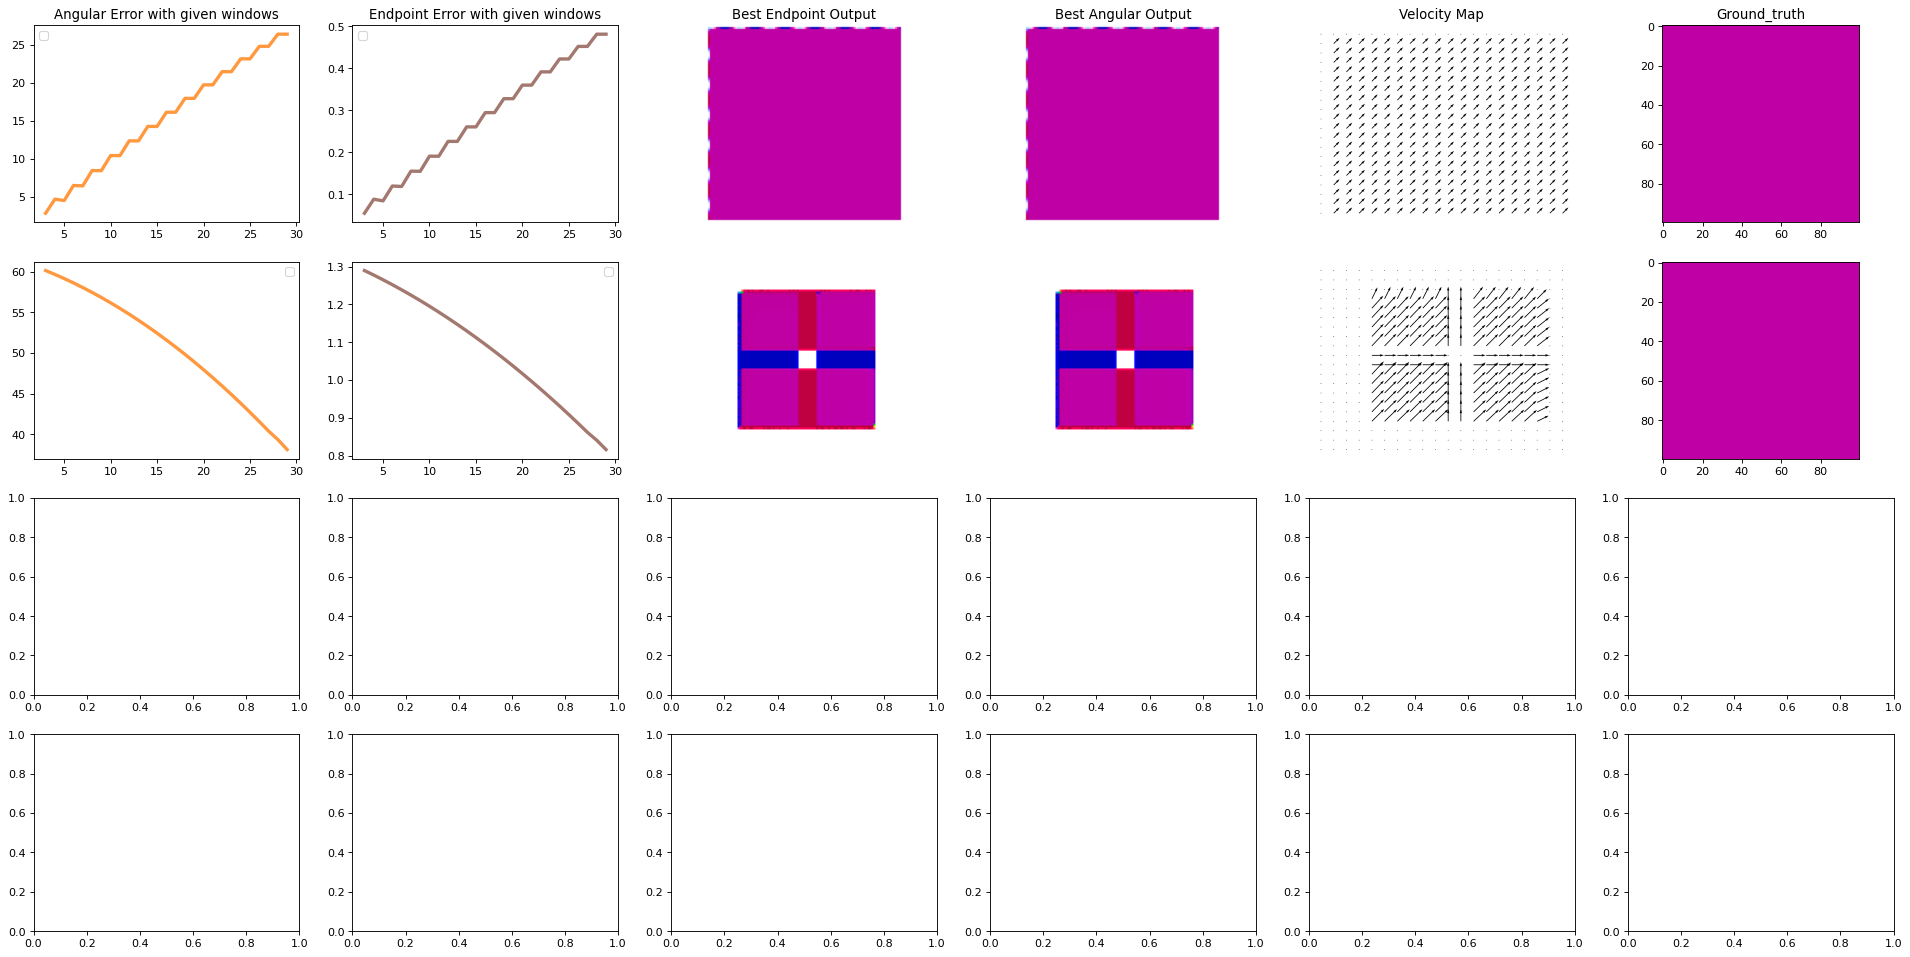

In [3]:
plot_all_LK(lucasKanade)


In [ ]:
plot_all_LK(lucasKanadeBartlett)